<a href="https://colab.research.google.com/github/hasanaliozkan-dev/datacampdl/blob/main/DataCampLesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Creating tensors in PyTorch***
Random tensors are very important in neural networks. Parameters of the neural networks typically are initialized with random weights (random tensors).

Let us start practicing building tensors in PyTorch library. As you know, tensors are arrays with an arbitrary number of dimensions, corresponding to NumPy's ndarrays. You are going to create a random tensor of sizes 3 by 3 and set it to variable your_first_tensor. Then, you will need to print it. Finally, calculate its size in variable tensor_size and print its value.

NB: In case you have trouble solving the problems, you can always refer to slides in the bottom right of the screen.

In [ ]:
# Import torch
import torch

# Create random tensor of size 3 by 3
your_first_tensor = torch.rand(3, 3)

# Calculate the shape of the tensor
tensor_size = your_first_tensor.shape

# Print the values of the tensor and its shape
print(your_first_tensor)
print(tensor_size)

### ***Matrix multiplication***
There are many important types of matrices which have their uses in neural networks. Some important matrices are matrices of ones (where each entry is set to 1) and the identity matrix (where the diagonal is set to 1 while all other values are 0). The identity matrix is very important in linear algebra: any matrix multiplied with identity matrix is simply the original matrix.

Let us experiment with these two types of matrices. You are going to build a matrix of ones with shape 3 by 3 called tensor_of_ones and an identity matrix of the same shape, called identity_tensor. We are going to see what happens when we multiply these two matrices, and what happens if we do an element-wise multiplication of them.

In [ ]:
# Create a matrix of ones with shape 3 by 3
tensor_of_ones = torch.ones(3, 3)

# Create an identity matrix with shape 3 by 3
identity_tensor = torch.eye(3)

# Do a matrix multiplication of tensor_of_ones with identity_tensor
matrices_multiplied = torch.matmul(tensor_of_ones, identity_tensor)
print(matrices_multiplied)

# Do an element-wise multiplication of tensor_of_ones with identity_tensor
element_multiplication = tensor_of_ones*identity_tensor
print(element_multiplication)

### ***Forward pass***
Let's have something resembling more a neural network. The computational graph has been given below. You are going to initialize 3 large random tensors, and then do the operations as given in the computational graph. The final operation is the mean of the tensor, given by torch.mean(your_tensor).
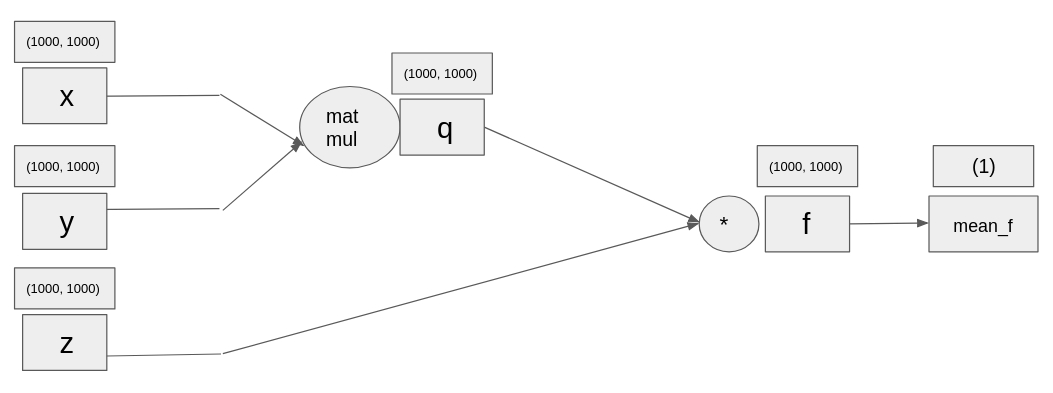



In [ ]:
# Initialize tensors x, y and z
x = torch.rand(1000, 1000)
y = torch.rand(1000, 1000)
z = torch.rand(1000, 1000)

# Multiply x with y
q = x*y

# Multiply elementwise z with q
f = z*q

mean_f = torch.mean(f)
print(mean_f)

### ***Backpropagation using PyTorch***
Here, you are going to use automatic differentiation of PyTorch in order to compute the derivatives of x, y and z from the previous exercise.

In [ ]:
# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad =True)
y = torch.tensor(-3., requires_grad =True)
z = torch.tensor(5., requires_grad =True)

# Set q to sum of x and y, set f to product of q with z
q = x+y
f = q*z

# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

### ***Calculating gradients in PyTorch***
Remember the exercise in forward pass? Now that you know how to calculate derivatives, let's make a step forward and start calculating the gradients (derivatives of tensors) of the computational graph you built back then. We have already initialized for you three random tensors of shape (1000, 1000) called x, y and z. First, we multiply tensors x and y, then we do an elementwise multiplication of their product with tensor z, and then we compute its mean. In the end, we compute the derivatives.

The main difference from the previous exercise is the scale of the tensors. While before, tensors x, y and z had just 1 number, now they each have 1 million numbers.


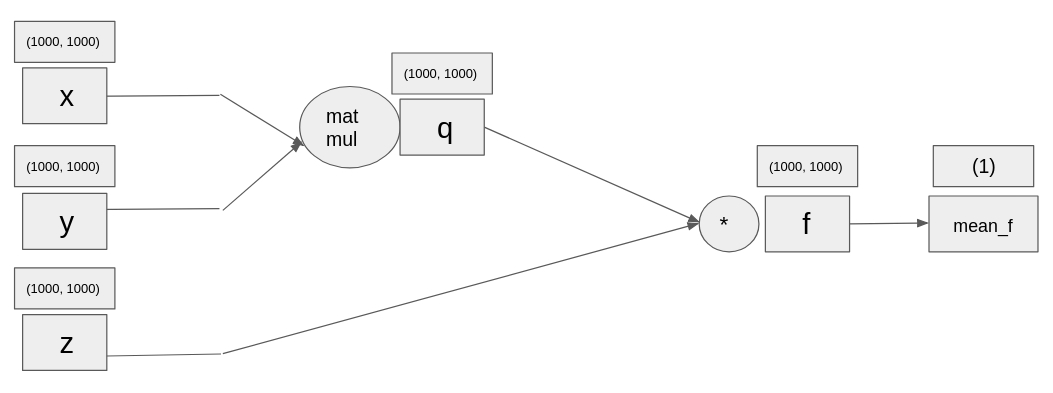

In [ ]:
# Multiply tensors x and y
q = x*y

# Elementwise multiply tensors z with q
f = z*q

mean_f = torch.mean(f)

# Calculate the gradients
mean_f.backward()

### ***Your first neural network***
You are going to build a neural network in PyTorch, using the hard way. Your input will be images of size (28, 28), so images containing 784 pixels. Your network will contain an input_layer (provided for you), a hidden layer with 200 units, and an output layer with 10 classes. The input layer has already been created for you. You are going to create the weights, and then do matrix multiplications, getting the results from the network.

In [ ]:
# Initialize the weights of the neural network
weight_1 = torch.rand(784, 200)
weight_2 = torch.rand(200, 10)

# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Multiply hidden_1 with weight_2
output_layer = torch.matmul(hidden_1, weight_2)
print(output_layer)

### ***Your first PyTorch neural network***
You are going to build the same neural network you built in the previous exercise, but now using the PyTorch way. As a reminder, you have 784 units in the input layer, 200 hidden units and 10 units for the output layer.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate all 2 linear layers  
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
      
        # Use the instantiated layers and return x
        x = self.fc1(x)
        x = self.fc2(x)
        return x

### ***Neural networks***
Let us see the differences between neural networks which apply ReLU and those which do not apply ReLU. We have already initialized the input called input_layer, and three sets of weights, called weight_1, weight_2 and weight_3.

We are going to convince ourselves that networks with multiple layers which do not contain non-linearity can be expressed as neural networks with one layer.

The network and the shape of layers and weights is shown below.

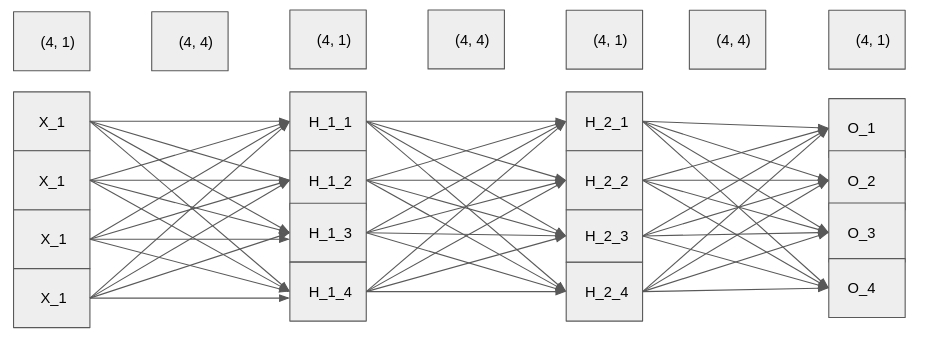

In [ ]:
# Calculate the first and second hidden layer
hidden_1 = torch.matmul(input_layer, weight_1)
hidden_2 = torch.matmul(hidden_1,weight_2)

# Calculate the output
print(torch.matmul(hidden_2,weight_3))

# Calculate weight_composed_1 and weight
weight_composed_1 = torch.matmul(weight_1, weight_2)
weight = torch.matmul(weight_composed_1, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

### ***ReLU activation***
In this exercise, we have the same settings as the previous exercise. But now we are going to build a neural network which has non-linearity. By doing so, we are going to convince ourselves that networks with multiple layers and non-linearity functions cannot be expressed as a neural network with one layer.
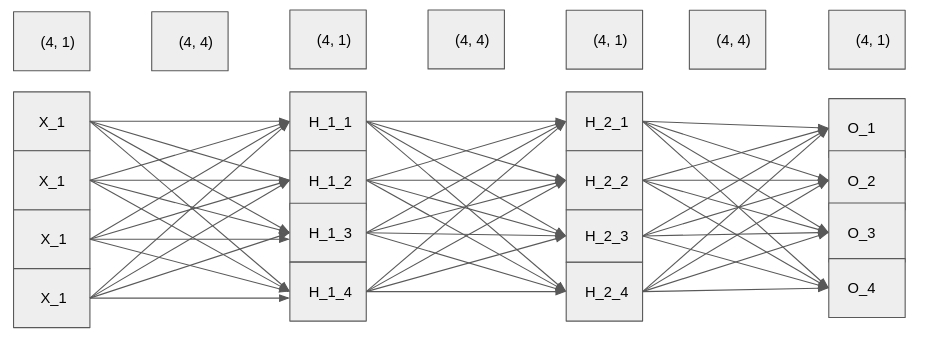


We have already instantiated the ReLU activation function called relu() for you.


In [ ]:
# Instantiate non-linearity
relu = nn.ReLU()

# Apply non-linearity on the hidden layers
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
print(torch.matmul(hidden_2_activated, weight_3))

# Apply non-linearity in the product of first two weights. 
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))

# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(weight_composed_1_activated, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

### ***ReLU activation again***
Neural networks don't need to have the same number of units in each layer. Here, you are going to experiment with the ReLU activation function again, but this time we are going to have a different number of units in the layers of the neural network. The input layer will still have 4 features, but then the first hidden layer will have 6 units and the output layer will have 2 units.

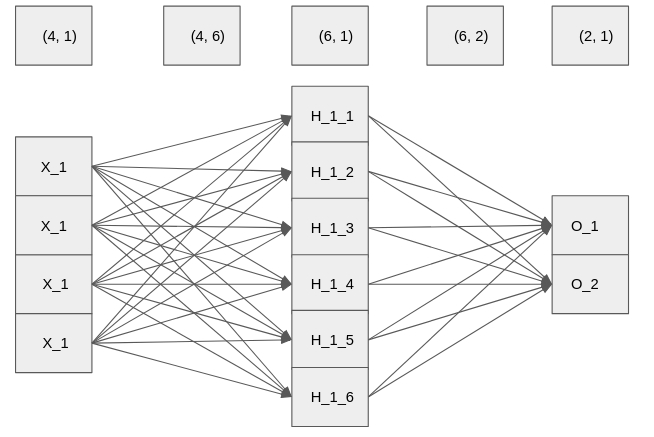


In [ ]:
# Instantiate ReLU activation function as relu
relu = nn.ReLU()

# Initialize weight_1 and weight_2 with random numbers
weight_1 = torch.rand(4, 6)
weight_2 = torch.rand(6, 2)

# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Apply ReLU activation function over hidden_1 and multiply with weight_2
hidden_1_activated = relu(hidden_1)
print(torch.matmul(hidden_1_activated, weight_2))

### ***Calculating loss function in PyTorch***
You are going to code the previous exercise, and make sure that we computed the loss correctly. Predicted scores are -1.2 for class 0 (cat), 0.12 for class 1 (car) and 4.8 for class 2 (frog). The ground truth is class 2 (frog). Compute the loss function in PyTorch.





```
Class	Predicted Score
Cat	    -1.2
Car	     0.12
Frog	    4.8
```







In [ ]:
# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

# Instantiate cross entropy loss
criterion = nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(logits,ground_truth)
print(loss)

### ***Loss function of random scores***
If the neural network predicts random scores, what would be its loss function? Let's find it out in PyTorch. The neural network is going to have 1000 classes, each having a random score. For ground truth, it will have class 111. Calculate the loss function.

In [ ]:
# Import torch and torch.nn
import torch
import torch.nn as nn

# Initialize logits and ground truth
logits = torch.rand(1,1000)
ground_truth = torch.tensor([111])

# Instantiate cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Calculate and print the loss
loss = criterion(logits,ground_truth)
print(loss)

### ***Preparing MNIST dataset***
You are going to prepare dataloaders for MNIST training and testing set. As we explained in the lecture, MNIST has some differences to CIFAR-10, with the main difference being that MNIST images are grayscale (1 channel based) instead of RGB (3 channels).

In [ ]:
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307), ((0.3081)))])

# Prepare training set and testing set
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False,
			   download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
										 shuffle = False, num_workers=0) 

### ***Inspecting the dataloaders***
Now you are going to explore a bit the dataloaders you created in the previous exercise. In particular, you will compute the shape of the dataset in addition to the minibatch size.

In [ ]:
# Compute the shape of the training set and testing set
trainset_shape = trainloader.dataset.train_data.shape
testset_shape = testloader.dataset.test_data.shape

# Print the computed shapes
print(trainset_shape, testset_shape)

# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

### ***Building a neural network - again***
You haven't created a neural network since the end of the first chapter, so this is a good time to build one (practice makes perfect). Build a class for a neural network which will be used to train on the MNIST dataset. The dataset contains images of shape (28, 28, 1), so you should deduct the size of the input layer. For hidden layer use 200 units, while for output layer use 10 units (1 for each class). For activation function, use relu in a functional way (nn.Functional is already imported as F).

For context, the same net will be trained and used to make predictions in the next two exercises.

In [ ]:
# Define the class Net
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):   
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### ***Training a neural network***
Given the fully connected neural network (called model) which you built in the previous exercise and a train loader called train_loader containing the MNIST dataset (which we created for you), you're to train the net in order to predict the classes of digits. You will use the Adam optimizer to optimize the network, and considering that this is a classification problem you are going to use cross entropy as loss function.

In [ ]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
model = Net()   
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
  
for batch_idx, data_target in enumerate(train_loader):
    data = data_target[0]
    target = data_target[1]
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()

    # Complete a forward pass
    output = model(data)

    # Compute the loss, gradients and change the weights
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

### ***Using the network to make predictions***
Now that you have trained the network, use it to make predictions for the data in the testing set. The network is called model (same as in the previous exercise), and the loader is called test_loader. We have already initialized variables total and correct to 0.

In [ ]:
# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28*28*1)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

### ***Convolution operator - OOP way***
Let's kick off this chapter by using convolution operator from the torch.nn package. You are going to create a random tensor which will represent your image and random filters to convolve the image with. Then you'll apply those images.

The torch library and the torch.nn package have already been imported for you.

In [ ]:
# Create 10 random images of shape (1, 28, 28)
images = torch.rand(10, 1, 28, 28)

# Build 6 conv. filters
conv_filters = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)

# Convolve the image with the filters 
output_feature = conv_filters(images)
print(output_feature.shape)

### ***Convolution operator - Functional way***
While I and most of PyTorch practitioners love the torch.nn package (OOP way), other practitioners prefer building neural network models in a more functional way, using torch.nn.functional. More importantly, it is possible to mix the concepts and use both libraries at the same time (we have already done it in the previous chapter). You are going to build the same neural network you built in the previous exercise, but this time using the functional way.

As before, we have already imported the torch library and torch.nn.functional as F.

In [ ]:
# Create 10 random images
image = torch.rand(10, 1, 28, 28)

# Create 6 filters
filters = torch.rand(6, 1, 3, 3)

# Convolve the image with the filters
output_feature = F.conv2d(image, filters, stride=1, padding=1)
print(output_feature.shape)

### ***Max-pooling operator***
Here you are going to practice using max-pooling in both OOP and functional way, and see for yourself that the produced results are the same. We have already created and printed the image for you, and imported torch library in addition to torch.nn and torch.nn.Functional as F packages.

In [ ]:
# Build a pooling operator with size `2`.
max_pooling = torch.nn.MaxPool2d(2)

# Apply the pooling operator
output_feature = max_pooling(im)

# Use pooling operator in the image
output_feature_F = F.max_pool2d(im,2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

Average-pooling operator
After coding the max-pooling operator, you are now going to code the average-pooling operator. You just need to replace max-pooling with average pooling.

In [ ]:
# Build a pooling operator with size `2`.
avg_pooling = torch.nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(im)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im,2)

# print the results of both cases
print(output_feature)
print(output_feature_F)

### ***Your first CNN - `__init__` method***
You are going to build your first convolutional neural network. You're going to use the MNIST dataset as the dataset, which is made of handwritten digits from 0 to 9. The convolutional neural network is going to have 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer. We have already imported torch and torch.nn as nn. Remember that each pooling layer halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes. MNIST images have shape (1, 28, 28)

For the moment, you are going to implement the __init__ method of the net. In the next exercise, you will implement the .forward() method.

NB: We need 2 pooling layers, but we only need to instantiate a pooling layer once, because each pooling layer will have the same configuration. Instead, we will use self.pool twice in the next exercise.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, 10)

### ***Your first CNN - forward() method***
Now that you have declared all the parameters of your CNN, all you need to do is to implement the net's forward() method, and voila, you have your very first PyTorch CNN.

Note: for evaluation purposes, the entire code of the class needs to be in the script. We are using the __init__ method as you have coded it on the previous exercise, while you are going to code the .forward() method here.

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
		
        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU()
        
        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc = nn.Linear(7 * 7 * 10, 10)

    def forward(self, x):
  
        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

### ***Training CNNs***
Similarly to what you did in Chapter 2, you are going to train a neural network. This time however, you will train the CNN you built in the previous lesson, instead of a fully connected network. The packages you need have been imported for you and the network (called net) instantiated. The cross-entropy loss function (called criterion) and the Adam optimizer (called optimizer) are also available. We have subsampled the training set so that the training goes faster, and you are going to use a single epoch.

In [ ]:
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)
        
    # Compute the loss function
    loss = criterion(outputs,labels)
        
    # Compute the gradients
    loss.backward()
    
    # Update the weights
    optimizer.step()

### ***Using CNNs to make predictions***
Building and training neural networks is a very exciting job (trust me, I do it every day)! However, the main utility of neural networks is to make predictions. This is the entire reason why the field of deep learning has bloomed in the last few years, as neural networks predictions are extremely accurate. On this exercise, we are going to use the convolutional neural network you already trained in order to make predictions on the MNIST dataset.

Remember that torch.max() takes two arguments: -output.data - the tensor which contains the data.

Either 1 to do argmax or 0 to do max.

In [ ]:
for i, data in enumerate(test_loader):

    # Get the image and label from data
    image, label = data

    # Make a forward pass in the net with your image
    output = net(image)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)
    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))

### ***Sequential module - init method***
Having learned about the sequential module, now is the time to see how you can convert a neural network that doesn't use sequential modules to one that uses them. We are giving the code to build the network in the usual way, and you are going to write the code for the same network using sequential modules.



```
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(7 * 7 * 40, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 10) 
```

We want the pooling layer to be used after the second and fourth convolutional layers, while the relu nonlinearity needs to be used after each layer except the last (fully-connected) layer. For the number of filters (kernels), stride, passing, number of channels and number of units, use the same numbers as above.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))

### ***Sequential module - forward() method***
Now, that you have defined all the modules that the network needs, it is time to apply them in the forward() method. For context, we are giving the code for the forward() method, if the net was written in the usual way.




```
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1)

        self.relu = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(7 * 7 * 40, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 10) 

    def forward():
        x = self.relu(self.conv1(x))
        x = self.relu(self.pool(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.relu(self.pool(self.conv4(x)))
        x = x.view(-1, 7 * 7 * 40)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```
Note: for evaluation purposes, the entire code of the class needs to be in the script. We are using the __init__ method as you have coded it on the previous exercise, while you are going to code the forward() method here.



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1), 
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                                      nn.MaxPool2d(2, 2), nn.ReLU(inplace=True))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 1024), nn.ReLU(inplace=True),
                                       	nn.Linear(1024, 2048), nn.ReLU(inplace=True),
                                        nn.Linear(2048, 10))
        
    def forward(self, x):
      
        # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classify the images
        x = self.classifier(x)
        return x

### ***Validation set***
You saw the need for validation set in the previous video. Problem is that the datasets typically are not separated into training, validation and testing. It is your job as a data scientist to split the dataset into training, testing and validation. The easiest (and most used) way of doing so is to do a random splitting of the dataset. In PyTorch, that can be done using SubsetRandomSampler object. You are going to split the training part of MNIST dataset into training and validation. After randomly shuffling the dataset, use the first 55000 points for training, and the remaining 5000 points for validation.

In [ ]:
# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

# Build the train loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('mnist', download=True, train=True,
                     transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                     batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:55000]))

# Build the validation loader
val_loader = torch.utils.data.DataLoader(datasets.MNIST('mnist', download=True, train=True,
                   transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])),
                   batch_size=64, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[55000:60000]))

### ***L2-regularization***
You are going to implement each of the regularization techniques explained in the previous video. Doing so, you will also remember important concepts studied throughout the course. You will start with l2-regularization, the most important regularization technique in machine learning. As you saw in the video, l2-regularization simply penalizes large weights, and thus enforces the network to use only small weights.

In [ ]:
# Instantiate the network
model = Net()

# Instantiate the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.001)

### ***Dropout***
You saw that dropout is an effective technique to avoid overfitting. Typically, dropout is applied in fully-connected neural networks, or in the fully-connected layers of a convolutional neural network. You are now going to implement dropout and use it on a small fully-connected neural network.

For the first hidden layer use 200 units, for the second hidden layer use 500 units, and for the output layer use 10 units (one for each class). For the activation function, use ReLU. Use .Dropout() with strength 0.5, between the first and second hidden layer. Use the sequential module, with the order being: fully-connected, activation, dropout, fully-connected, activation, fully-connected.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        
        # Define all the parameters of the net
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 10))
        
    def forward(self, x):
    
    	# Do the forward pass
        return self.classifier(x)

### ***Batch-normalization***
Dropout is used to regularize fully-connected layers. Batch-normalization is used to make the training of convolutional neural networks more efficient, while at the same time having regularization effects. You are going to implement the __init__ method of a small convolutional neural network, with batch-normalization. The feature extraction part of the CNN will contain the following modules (in order): convolution, max-pool, activation, batch-norm, convolution, max-pool, relu, batch-norm.

The first convolutional layer will contain 10 output channels, while the second will contain 20 output channels. As always, we are going to use MNIST dataset, with images having shape (28, 28) in grayscale format (1 channel). In all cases, the size of the filter should be 3, the stride should be 1 and the padding should be 1.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20))
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=7*7*20, out_features=10)

### ***Finetuning a CNN***
Previously, you trained a model to classify handwritten digits and saved the model parameters to my_net.pth. Now you're going to classify handwritten letters, but you have a smaller training set.

In the first step, you'll create a new model using this training set, but the accuracy will be poor. Next, you'll perform the same training, but you'll start with the parameters from your digit classifying model. Even though digits and letters are two different classification problems, you'll see that using information from your previous model will dramatically improve this one.

In [ ]:
# Create a model using
model = Net()

# Load the parameters from the old model
model.load_state_dict(torch.load('my_net.pth'))

# Change the number of out channels
model.fc = nn.Linear(7 * 7 * 512, 26)

# Train and evaluate the model
model.train()
train_net(model, optimizer, criterion)
print("Accuracy of the net is: " + str(model.eval()))

### ***Torchvision module***
You already finetuned a net you had pretrained. In practice though, it is very common to finetune CNNs that someone else (typically the library's developers) have pretrained in ImageNet. Big networks still take a lot of time to be trained on large datasets, and maybe you cannot afford to train a large network on a dataset of 1.2 million images on your laptop.

Instead, you can simply download the network and finetune it on your dataset. That's what you will do right now. You are going to assume that you have a personal dataset, containing the images from all your last 7 holidays. You want to build a neural network that can classify each image depending on the holiday it comes from. However, since the dataset is so small, you need to use the finetuning technique.

In [ ]:
# Import the module
import torchvision

# Download resnet18
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the layers bar the last one
for param in model.parameters():
    param.requires_grad = False

# Change the number of output units
model.fc = nn.Linear(512, 7)